In [1]:
import mytry
from utils import evaluate as my_eval

In [2]:
filepath = "./data/seoul_preprocessed2_y_nextquarter.csv"

x_train, y_train, x_test, y_test, scaler = mytry.get_traintest(
    filepath=filepath,
    pred_category='편의점', 
    y_next_quarter=True, 
    random_split=True, 
    norm='Standard', 
    pca=False
)

[train] 2017_1 : (1147, 30), accumulate : (1147, 30)
[train] 2017_2 : (1147, 30), accumulate : (2294, 30)
[train] 2017_3 : (1147, 30), accumulate : (3441, 30)
[train] 2017_4 : (1147, 30), accumulate : (4588, 30)
[train] 2018_1 : (1147, 30), accumulate : (5735, 30)
[train] 2018_2 : (1147, 30), accumulate : (6882, 30)
[train] 2018_3 : (1147, 30), accumulate : (8029, 30)
[test] 2019_1 : (1147, 30), accumulate : (1147, 30)
[test] 2019_2 : (1147, 30), accumulate : (2294, 30)
[test] 2019_3 : (1147, 30), accumulate : (3441, 30)
[test] 2018_4 : (1147, 30), accumulate : (4588, 30)
x_header ['남성연령대_10_유동인_수', '남성연령대_20_유동인_수', '남성연령대_30_유동인_수', '남성연령대_40_유동인_수', '남성연령대_50_유동인_수', '남성연령대_60_유동인_수', '여성연령대_10_유동인_수', '여성연령대_20_유동인_수', '여성연령대_30_유동인_수', '여성연령대_40_유동인_수', '여성연령대_50_유동인_수', '여성연령대_60_유동인_수'] y_header ['다음분기_매출_금액']


------- evaluate LGBMRegressor() -------
RMSE : 0.861336
R2 : 0.226667
12978.546185881461 4588
평균 오차 3%
최대 오차 5542%
최소 오차 0%
----------------------------


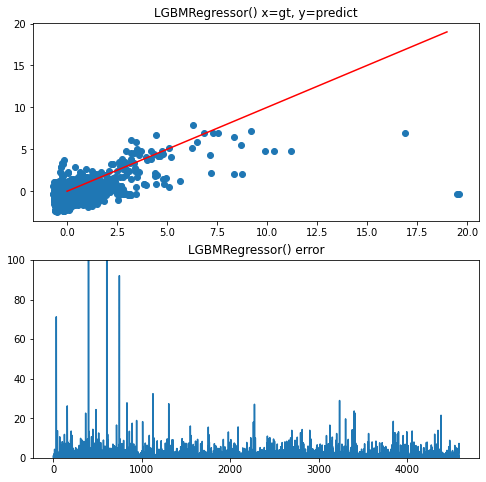

In [3]:
model_LGBM_std =mytry.main(
    modelname='LGBM_std',
    datasets = [x_train, y_train, x_test, y_test],
    scaler = scaler
)

In [4]:
model_2MLP_std = mytry.main(
    modelname='2-MLP_std',
    datasets = [x_train, y_train, x_test, y_test],
    scaler = scaler,
    n_hidden=2,
    epoch=5000
)

.

KeyboardInterrupt: 

In [ ]:
model_3MLP_std = mytry.main(
    modelname='3-MLP_std',
    datasets = [x_train, y_train, x_test, y_test],
    scaler = scaler,
    n_hidden=3,
    epoch=5000
)

# Evaluate

In [ ]:
my_eval.eval_regression(y_test, model_LGBM_std.predict(x_test), scaler=scaler, model_name='LGBM with Z-transform')

In [ ]:
my_eval.eval_regression(y_test, model_2MLP_std.predict(x_test), scaler=scaler, model_name='2-MLP with Z-transform')

In [ ]:
my_eval.eval_regression(y_test, model_3MLP_std.predict(x_test), scaler=scaler, model_name='3-MLP with Z-transform')